In [67]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [68]:
# constants
num_nodes = [80, 100]
degree = 3
networks = [nx.to_numpy_array(nx.random_regular_graph(degree, num_nodes)) for num_nodes in num_nodes]

In [69]:
def LAIE(W: np.ndarray, x_0: np.ndarray, timesteps=100, runs=100, epsilon=0.01) -> np.ndarray:
	'''
	Local Average and Information Exchange algorithm
	'''
	num_nodes = W.shape[0]
	x_avg = np.mean(x_0) * np.ones(num_nodes)
	x_history = np.zeros((timesteps, num_nodes))
	x_history[0] = x_0

	for t in range(1, timesteps):
		x_history[t] = W @ x_history[t-1]


	return x_history

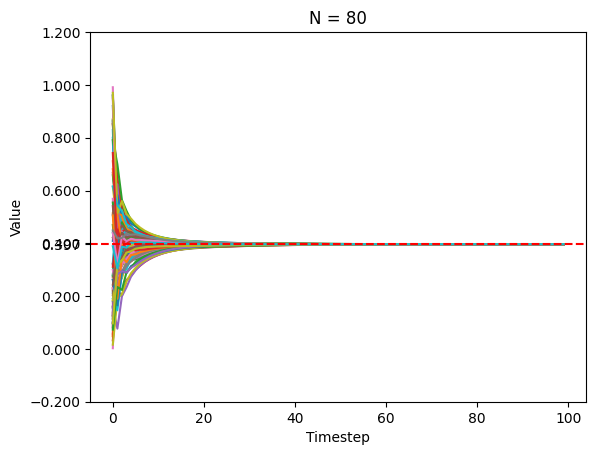

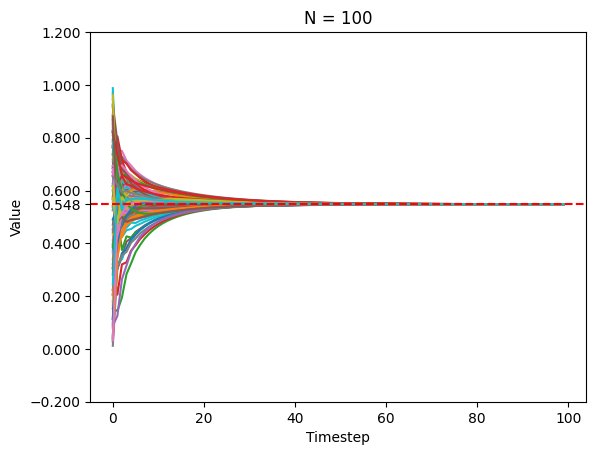

In [70]:
for A in networks:
	N = A.shape[0]
	initial_state = np.random.rand(N)
	avg_state = np.mean(initial_state)

	A += np.eye(N)
	W = (1 / np.sum(A, axis=0)) * A
	results = LAIE(W, initial_state, timesteps=100, runs=1)

	plt.title(f'N = {N}')
	plt.xlabel('Timestep')
	plt.ylabel('Value')
	plt.plot(results)
	plt.axhline(avg_state, color='r', linestyle='--')
	plt.yticks(list(plt.yticks()[0]) + [avg_state])
	plt.show()